In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly_express as px

pyo.init_notebook_mode(connected=True)

In [4]:
file = 'data/Ernst&Young-Basedata.xlsx'
columns = ['Number','Asset Name', 'FCI', 'Size',
          'Replacement Value (USD)','Lat', 'Lon', 'Region Name']
dframe = pd.read_excel(file, usecols=columns, index_col='Number')
dframe.columns = [x.lower() for x in list(dframe.columns)]
dframe['fci'] = dframe['fci'] * 100

In [5]:
dframe.head()

,asset name,fci,replacement value (usd),size,lat,lon,region name
Number,,,,,,,
B00020,Baltimore City Police Headquarters,50.744446,1.455281e+08,426544,39.290280,-76.607780,DGS-Service and Business Facilities
B00021,Baltimore City Police Headquarters Annex,21.365677,4.091397e+07,105246,39.290280,-76.606950,DGS-Service and Business Facilities
B00023,Baltimore City Police Central District,72.053353,2.644053e+07,56228,39.290000,-76.608540,DGS-Service and Business Facilities
B00025,Baltimore City Police North Eastern District,78.528513,1.064207e+07,29314,39.340753,-76.582806,DGS-Service and Business Facilities
B00026,Baltimore City Police North Western District,76.978572,1.021853e+07,24826,39.344620,-76.685455,DGS-Service and Business Facilities


In [6]:
data = go.Histogram(
    x = dframe['fci'],
    marker = {'color': 'grey'})

layout = {'hovermode':'closest',
         'xaxis': {'title': 'Facility Condition Index'},
         'yaxis': {'showgrid':False}}
fig = {'data':[data], 'layout':layout}
pyo.iplot(fig)

In [ ]:
# scatter fci and replacement value

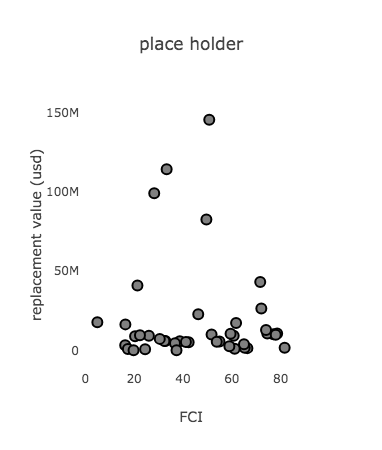

In [94]:
trace = go.Scatter(
    x = dframe['fci'],
    y = dframe['replacement value (usd)'],
    name = 'zzz',
    mode = 'markers',
    marker = {'size':10,
             'color':'grey',
             'line': {'width':2,
                     'color':'black'}},
    text = dframe['asset name']
)

layout = {'title':'place holder',
         'hovermode':'closest',
         'yaxis':{'zeroline':False,
                 'title':'replacement value (usd)',
                 'showgrid':False},
         'xaxis':{'zeroline':False,
                 'title':'FCI',
                 'showgrid':False}}
fig = {'data':[trace], 'layout':layout}
pyo.iplot(fig)

In [95]:
# scatter fci over vs under 60

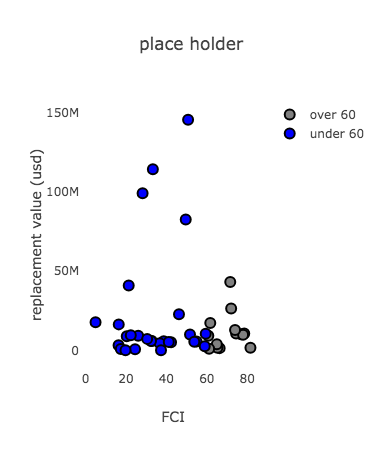

In [103]:
trace1 = go.Scatter(
    x = dframe[(dframe['fci']>=60)]['fci'],
    y = dframe[(dframe['fci']>=60)]['replacement value (usd)'],
    name = 'over 60',
    mode = 'markers',
    marker = {'size':10,
             'color':'grey',
             'line': {'width':2,
                     'color':'black'}},
    text = dframe['asset name'])

trace2 = go.Scatter(
    x = dframe[(dframe['fci']<60)]['fci'],
    y = dframe[(dframe['fci']<60)]['replacement value (usd)'],
    name = 'under 60',
    mode = 'markers',
    marker = {'size':10,
             'color':'blue',
             'line': {'width':2,
                     'color':'black'}},
    text = dframe['asset name'])

layout = {'title':'place holder',
         'hovermode':'closest',
         'yaxis':{'zeroline':False,
                 'title':'replacement value (usd)',
                 'showgrid':False},
         'xaxis':{'zeroline':False,
                 'title':'FCI',
                 'showgrid':False}}
fig = {'data':[trace1,trace2], 'layout':layout}
pyo.iplot(fig)

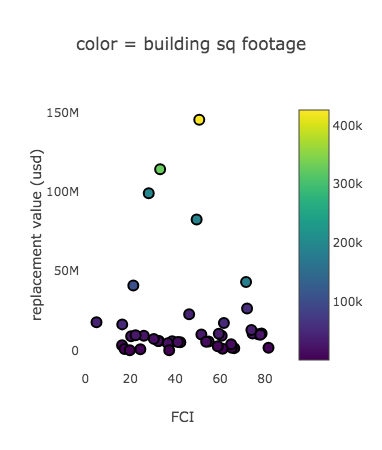

In [114]:
trace1 = go.Scatter(
    x = dframe['fci'],
    y = dframe['replacement value (usd)'],
    mode = 'markers',
    marker = {'size':10,
              'color':dframe['size'],
             'line': {'width':2,
                     'color':'black'},
             'colorscale':'Viridis',
             'showscale':True},
    text = dframe['asset name'],
)


layout = {'title':'color = building sq footage',
         'hovermode':'closest',
         'yaxis':{'zeroline':False,
                 'title':'replacement value (usd)',
                 'showgrid':False},
         'xaxis':{'zeroline':False,
                 'title':'FCI',
                 'showgrid':False}}
fig = {'data':[trace1], 'layout':layout}
pyo.iplot(fig)

## Establish an account with [mapbox](https://www.mapbox.com/), get your account token and included here to be able to generate and render maps.  

In [ ]:
mapbox_token = INSERT_YOUR_MAPBOX_ACCOUNT_TOKEN_HERE

In [117]:
# select mapbox map style
shaz13_style = 'mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i'
decimal_style = 'mapbox://styles/brl1906/cjroao74x1cmo2tpeg7nejmhj'
moonlight_style = 'mapbox://styles/brl1906/cjroaxzmf7ugx2spmidma7o3a'

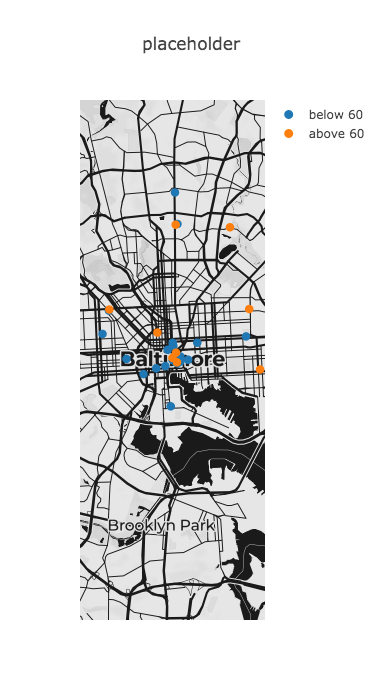

In [134]:
trace1 = go.Scattermapbox(
    lat = dframe[(dframe['fci']<=60)]['lat'],
    lon = dframe[(dframe['fci']<=60)]['lon'],
    name = 'below 60',
    mode = 'markers',
    marker = go.scattermapbox.Marker(
        size = 9),
    text = dframe['asset name'])

trace2 = go.Scattermapbox(
    lat = dframe[(dframe['fci']>60)]['lat'],
    lon = dframe[(dframe['fci']>60)]['lon'],
    name = 'above 60',
    mode = 'markers',
    marker = go.scattermapbox.Marker(
        size = 9),
    text = dframe['asset name'])

layout = {'title':'placeholder',
         'autosize':True,
         'hovermode':'closest',
         'mapbox': {'accesstoken':mapbox_token,
                   'center':{'lat':39.29088,
                            'lon':-76.61072},
                   'style':moonlight_style,
                   'zoom':10.5},
         'width':1000,
         'height':700}
fig = {'data':[trace1,trace2],'layout':layout}
pyo.iplot(fig)

In [ ]:
# heatmap